In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
data = pd.read_csv("Chennai house data.csv")
data

price  area              status  bhk  bathroom  age     location  \
0      37.49   872       Ready to move    2       NaN  1.0    Sembakkam   
1      93.54  1346  Under Construction    3       2.0  NaN     Selaiyur   
2     151.00  2225  Under Construction    3       NaN  0.0    Mogappair   
3      49.00  1028       Ready to move    2       2.0  3.0     Ambattur   
4      42.28   588  Under Construction    2       1.0  0.0   Pallavaram   
...      ...   ...                 ...  ...       ...  ...          ...   
2615   27.50   750       Ready to move    2       2.0  3.0  Veppampattu   
2616   27.50   750       Ready to move    2       2.0  3.0  Veppampattu   
2617   30.00   800       Ready to move    2       2.0  3.0  Veppampattu   
2618   31.50   850       Ready to move    2       2.0  3.0  Veppampattu   
2619   34.00   900       Ready to move    2       2.0  3.0  Veppampattu   

                                   builder  
0                            MP Developers  
1                            DAC Promoters  
2        Casagrand Builder Private Limited  
3                   Dugar Housing Builders  
4     Radiance Realty Developers India Ltd  
...                                    ...  
2615              Velan Housing Properties  
2616              Velan Housing Properties  
2617              Velan Housing Properties  
2618              Velan Housing Properties  
2619              Velan Housing Properties  

[2620 rows x 8 columns]

In [4]:
data = data.drop(columns = "bathroom")

In [5]:
data.isnull().sum()

price         0
area          0
status        0
bhk           0
age         891
location      0
builder       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       1729 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


# Missing Values

In [7]:
sum(data['age'].unique())

nan

In [8]:
data['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       1729 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


In [10]:
data["age"]

0       1.0
1       NaN
2       0.0
3       3.0
4       0.0
       ... 
2615    3.0
2616    3.0
2617    3.0
2618    3.0
2619    3.0
Name: age, Length: 2620, dtype: float64

In [11]:
data['age'].fillna((data['age'].median()), inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       2620 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


In [13]:
len(data['location'].unique())

178

In [14]:
data['age'].fillna((data['age'].median()), inplace = True)

In [15]:
data['age'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [16]:
data["price"].max()

1422.0

# Outliers

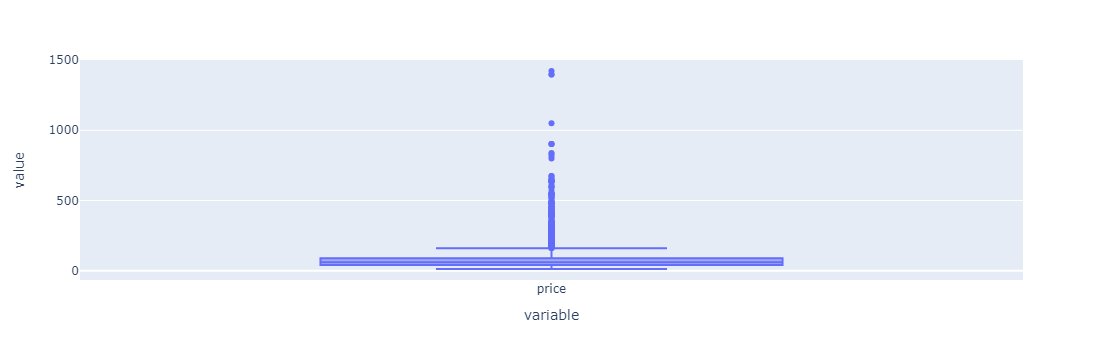

In [17]:
px.box(data['price'])

In [18]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['price'] = np.where(data['price'] > ubound, ubound,np.where(data['price'] < lbound, lbound, data['price']))


42.0 90.0 48.0
-30.0 162.0


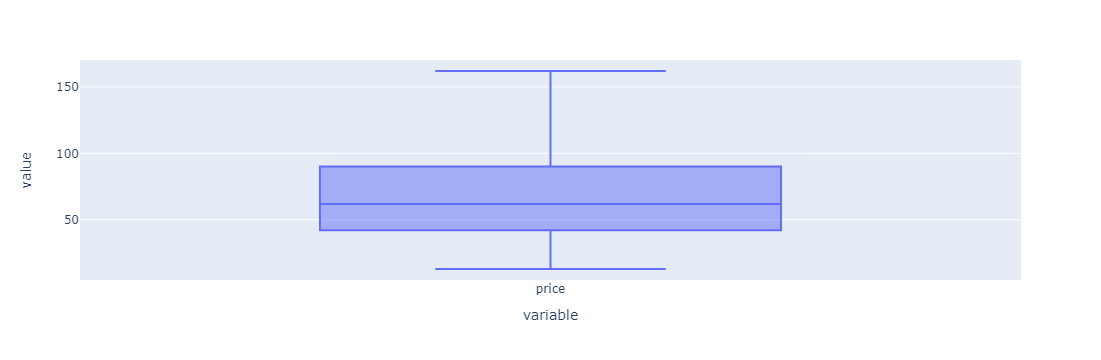

In [19]:

px.box(data['price'])

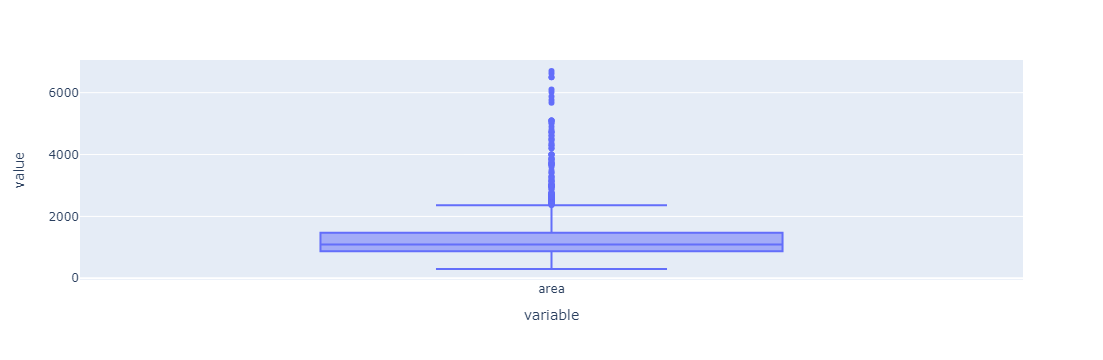

In [20]:
px.box(data['area'])

877.0 1471.25 594.25
-14.375 2362.625


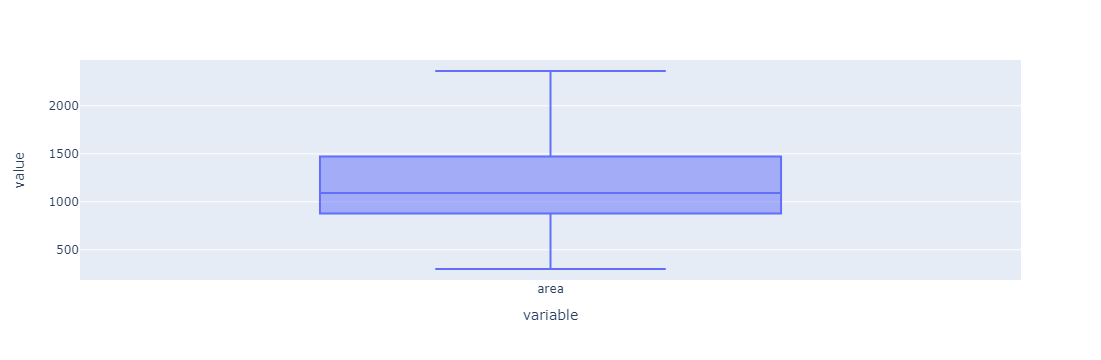

In [21]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['area'] = np.where(data['area'] > ubound, ubound, 
                        np.where(data['area'] < lbound, lbound, data['area']))
px.box(data['area'])

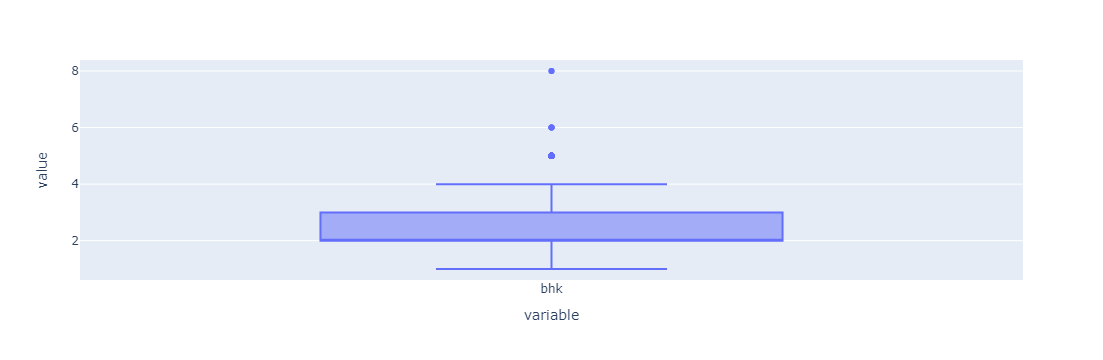

In [22]:
px.box(data['bhk'])

2.0 3.0 1.0
0.5 4.5


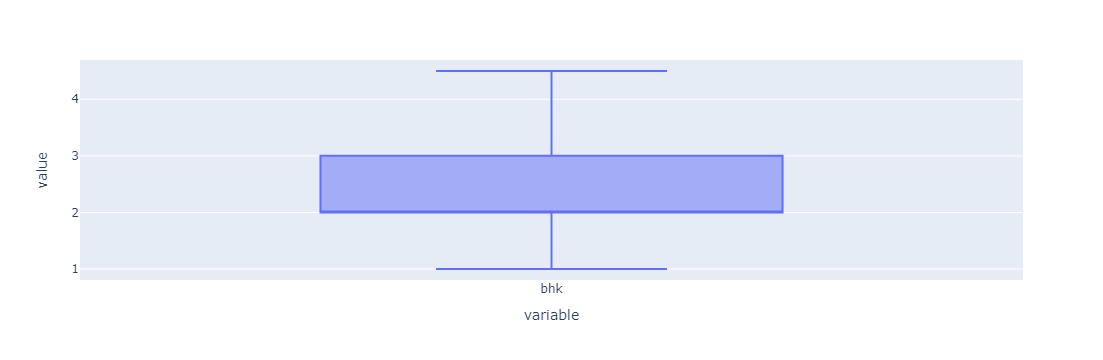

In [23]:
Q1 = data['bhk'].quantile(0.25)
Q3 = data['bhk'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['bhk'] = np.where(data['bhk'] > ubound, ubound, 
                        np.where(data['bhk'] < lbound, lbound, data['bhk']))
px.box(data['bhk'])

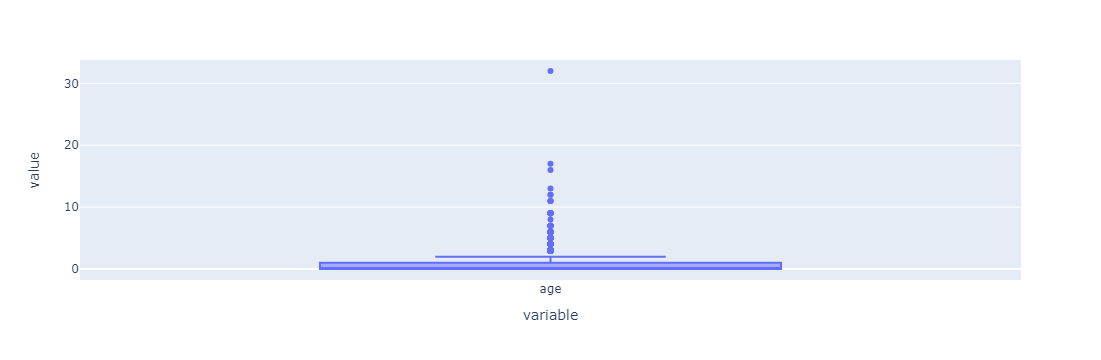

In [24]:
px.box(data['age'])

0.0 1.0 1.0
-1.5 2.5


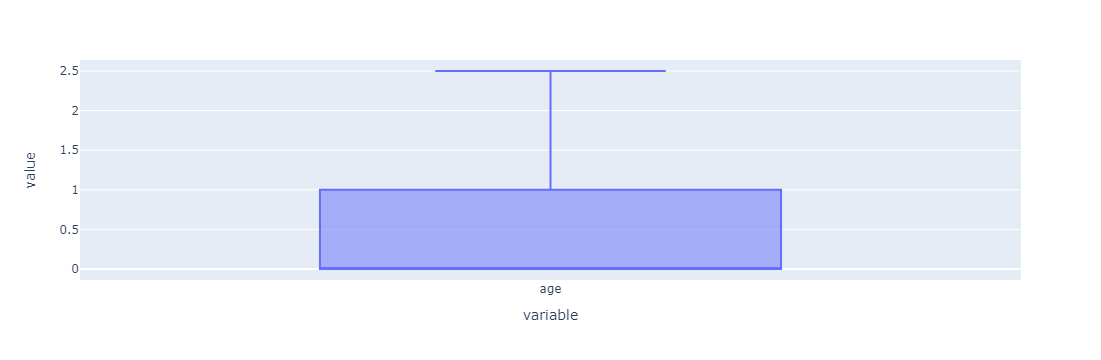

In [25]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['age'] = np.where(data['age'] > ubound, ubound, 
                        np.where(data['age'] < lbound, lbound, data['age']))
px.box(data['age'])

# label Encoding

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data
df = pd.DataFrame(data)

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform each column
data['status'] = le.fit_transform(data['status'])
data['location'] = le.fit_transform(data['location'])
data['builder'] = le.fit_transform(data['builder'])

# Show the resulting DataFrame
data

price    area  status  bhk  age  location  builder
0      37.49   872.0       0  2.0  1.0       137       60
1      93.54  1346.0       1  3.0  0.0       136       20
2     151.00  2225.0       1  3.0  0.0        82       18
3      49.00  1028.0       0  2.0  2.5         5       26
4      42.28   588.0       1  2.0  0.0       105       88
...      ...     ...     ...  ...  ...       ...      ...
2615   27.50   750.0       0  2.0  2.5       171      122
2616   27.50   750.0       0  2.0  2.5       171      122
2617   30.00   800.0       0  2.0  2.5       171      122
2618   31.50   850.0       0  2.0  2.5       171      122
2619   34.00   900.0       0  2.0  2.5       171      122

[2620 rows x 7 columns]

# Splitting data

In [27]:
import pandas as pd
from sklearn.preprocessing import minmax_scale

# Assuming 'data' is your DataFrame with the relevant features and target variable

# Define target and features
Y = data['price']

# Apply Min-Max scaling to the feature set
X_scaled = minmax_scale(data.drop(columns=['price']))

# Convert the scaled array back to a DataFrame
X = pd.DataFrame(data=X_scaled, columns=data.drop(columns=['price']).columns)

# Display the first few rows of the scaled features
print(X.head())


       area  status       bhk  age  location   builder
0  0.277317     0.0  0.285714  0.4  0.774011  0.447761
1  0.507121     1.0  0.571429  0.0  0.768362  0.149254
2  0.933277     1.0  0.571429  0.0  0.463277  0.134328
3  0.352948     0.0  0.285714  1.0  0.028249  0.194030
4  0.139628     1.0  0.285714  0.0  0.593220  0.656716


In [28]:
X.min()

area        0.0
status      0.0
bhk         0.0
age         0.0
location    0.0
builder     0.0
dtype: float64

In [29]:
X.max()

area        1.0
status      1.0
bhk         1.0
age         1.0
location    1.0
builder     1.0
dtype: float64

# XGboost Regreesion

In [36]:
from xgboost import  XGBRegressor
from sklearn.model_selection import train_test_split as tts


Y = data['price']
X = data.drop(columns=['price'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

lrboost2 = XGBRegressor()
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)

# Train the models
lrboost2.fit(x_train, y_train)

# Predict using both models
predictions5 = lrboost2.predict(x_test)




MAE: 5.208642689071539
MSE: 86.35318407601824
RMSE: 9.292641393921226
Accuracy: 94.94597086323725


<BarContainer object of 6 artists>

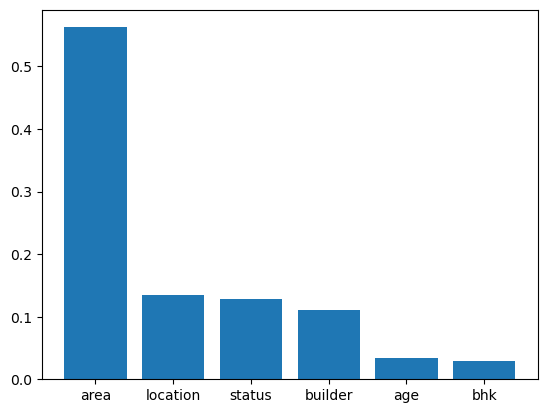

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae4 = mean_absolute_error(y_true=y_test, y_pred=predictions5)
mse4 = mean_squared_error(y_true=y_test, y_pred=predictions5)
rmse4 = mean_squared_error(y_true=y_test, y_pred=predictions5, squared=False)
acc4 = lrboost2.score(x_test, y_test) * 100

# Print evaluation metrics
print("MAE:", mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("Accuracy:", acc4)



importances = lrboost2.feature_importances_

# Create a dataframe to view the importance ranking
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.bar(feature_importance["Feature"],feature_importance["Importance"])

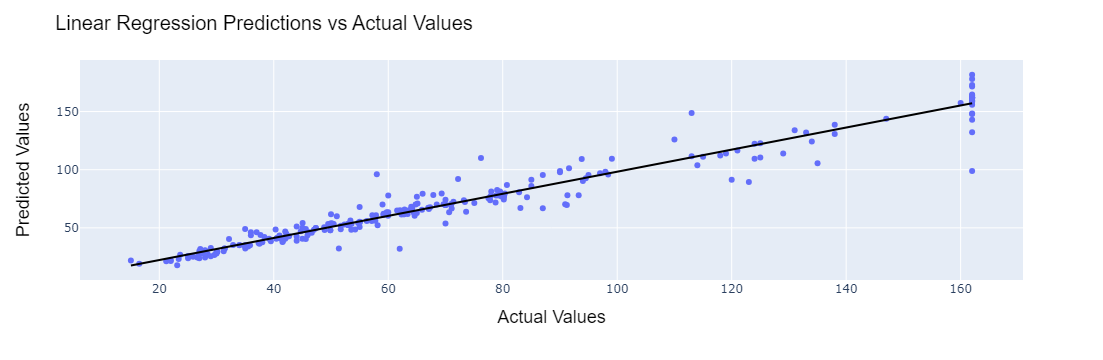

In [32]:
fig = px.scatter(x=y_test, y=predictions5, trendline='ols', trendline_color_override="black")
fig.update_layout(
    title={
        'text': 'Linear Regression Predictions vs Actual Values',
        'font': {
            'color': 'black',
            'size': 20,
            'family': 'Arial'
        }
    },
    xaxis_title={
        'text': 'Actual Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    },
    yaxis_title={
        'text': 'Predicted Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    }
)
fig.show()

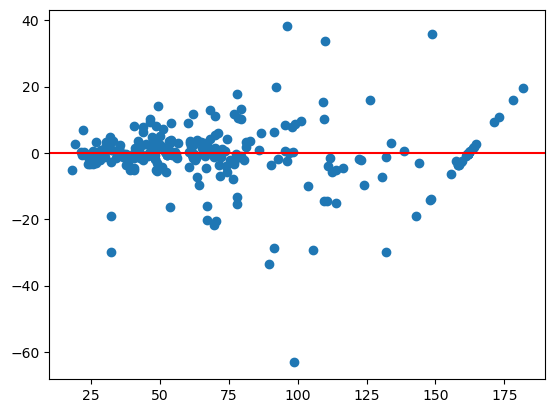

In [33]:
val = predictions5 - y_test
plt.scatter(predictions5, val)
plt.axhline(y=0, color='red')

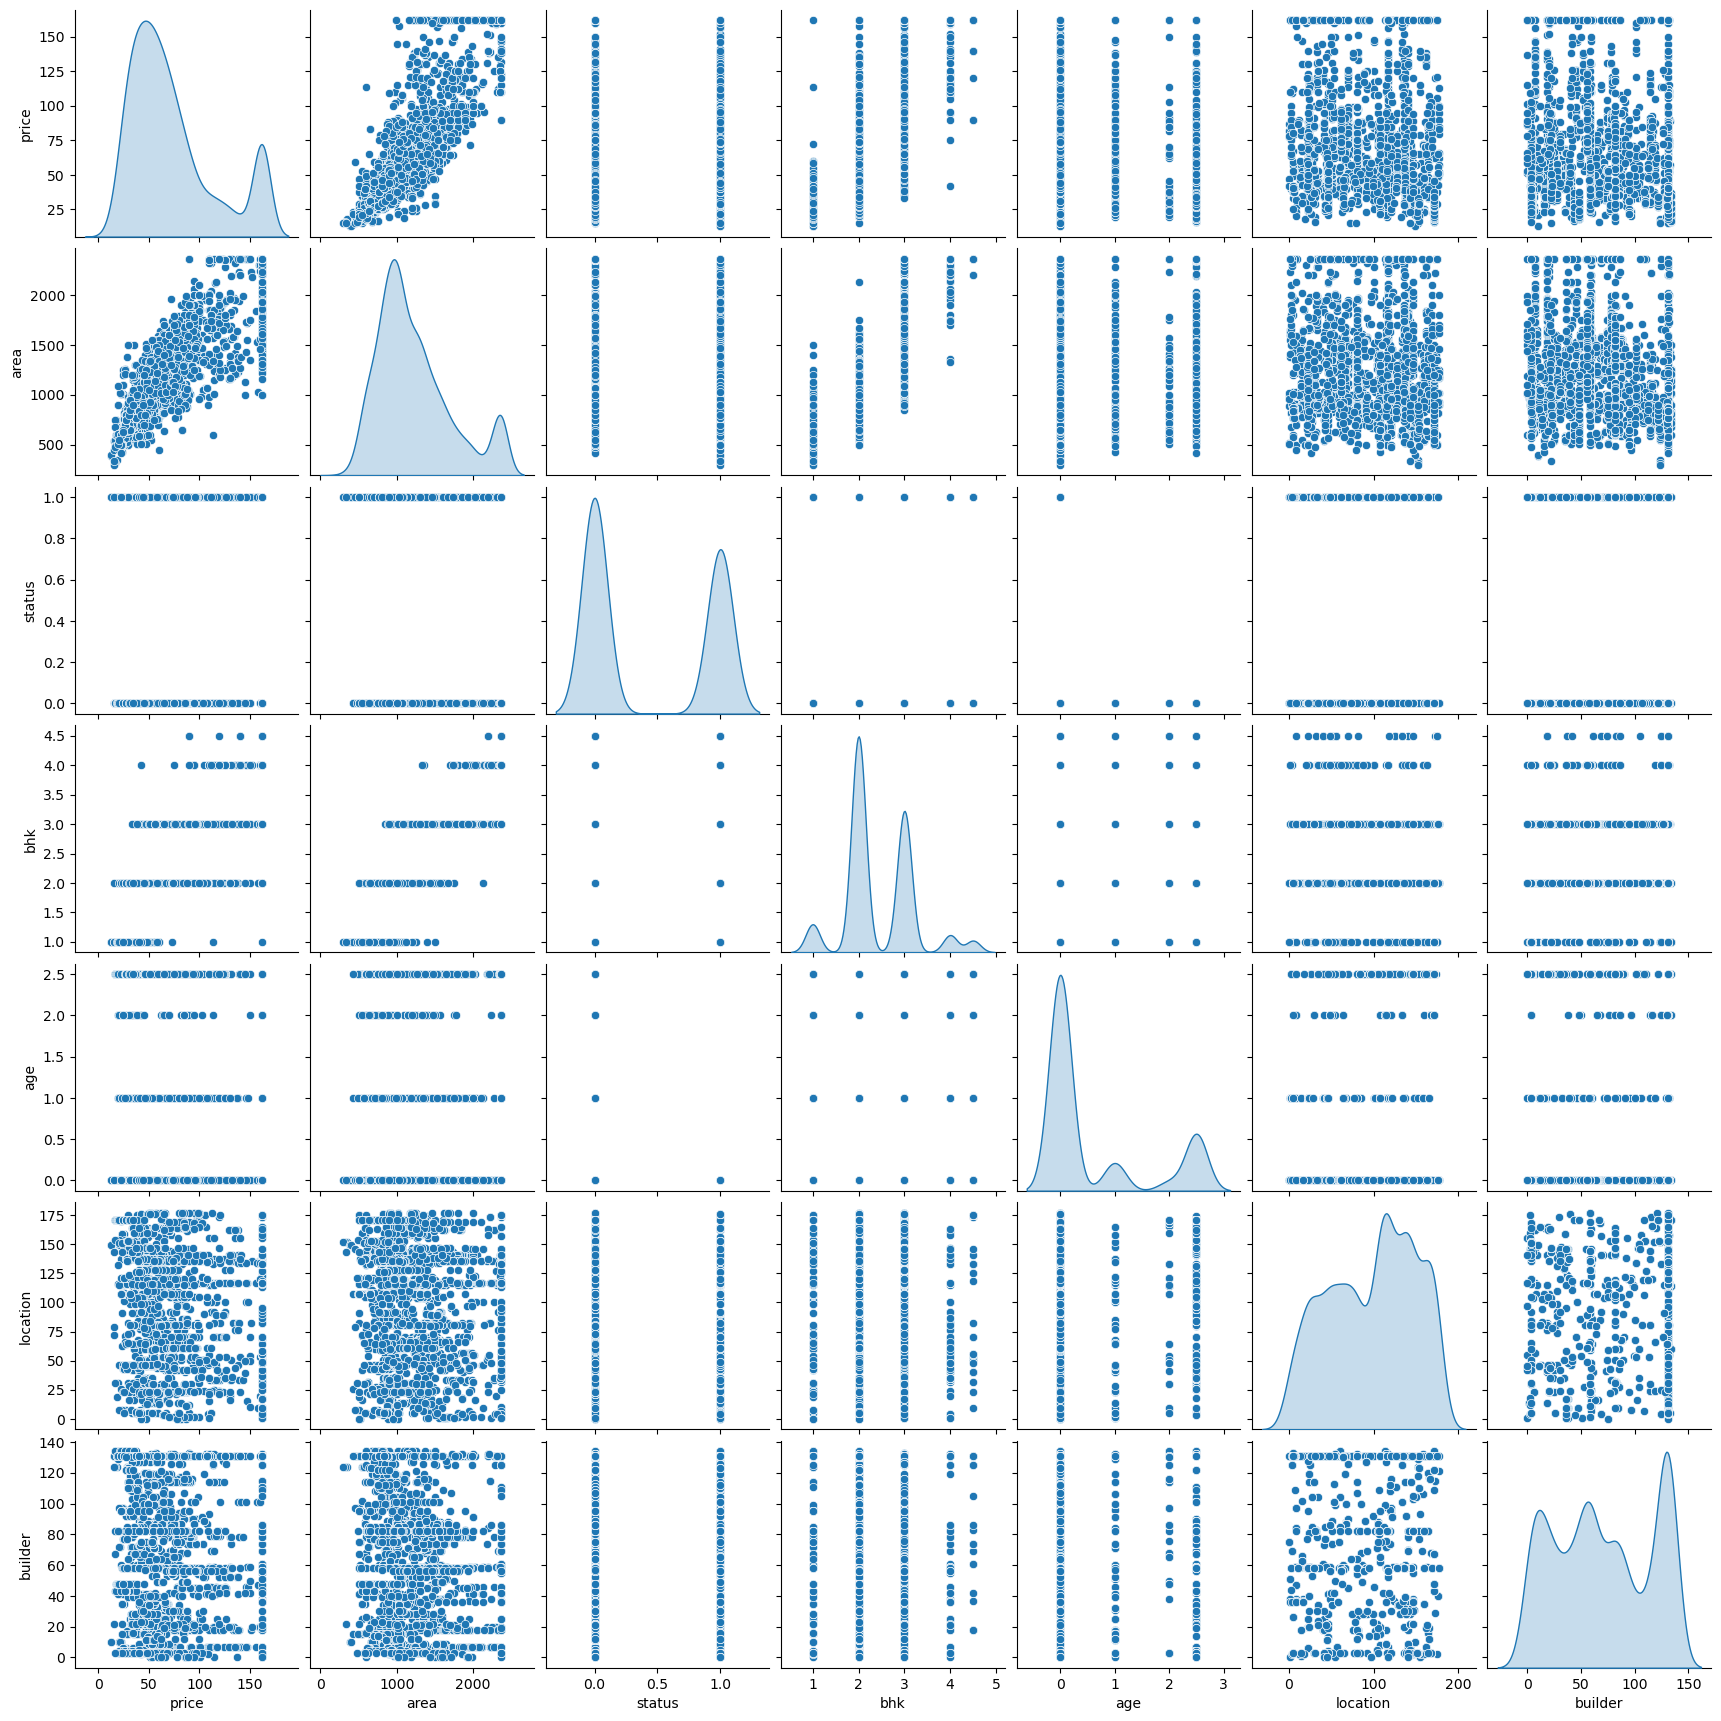

In [34]:
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()

In [35]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Assuming you have a DataFrame called 'data' with your features
# For example:
# data = pd.read_csv('your_dataset.csv')

# Prepare the data (drop the target variable)
X = data.drop(columns=['price',"area"])  # Replace 'price' with your target variable

# Add a constant to the model (intercept)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)


    Feature       VIF
0    status  2.084495
1       bhk  5.176180
2       age  1.666142
3  location  3.891238
4   builder  3.062932
